# Tutorial on Quantum Programming: An Introduction

### Earlier: <br/>1/3 Motivation: Why Quantum Computing? <br/>2/3 Elements of Quantum Programming
### Now: <br/> 3/3 Solving Problems with Quantum Programs

### Abraham Asfaw (@abe_asfaw), IBM Quantum

# So far, we have seen quantum programs where classical computers are used to interpret measurement outcomes.

# Variational eigensolvers = hybrid quantum-classical algorithms

# Building variational eigensolvers using Qiskit

In [1]:
import numpy as np
import matplotlib.pyplot as plotter

import sys
sys.path.append("ieeeqw2020-abe-asfaw-talk-dependencies/")

import warnings
warnings.filterwarnings('ignore')

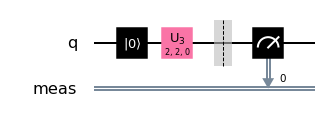

In [2]:
from qiskit import QuantumCircuit

my_circuit = QuantumCircuit(1)

my_circuit.reset(0)
my_circuit.u3(theta = 2, phi = 2, lam = 0, qubit=0) # can change theta, phi and lam
my_circuit.measure_all()

my_circuit.draw()

{'0': 2961, '1': 7039}


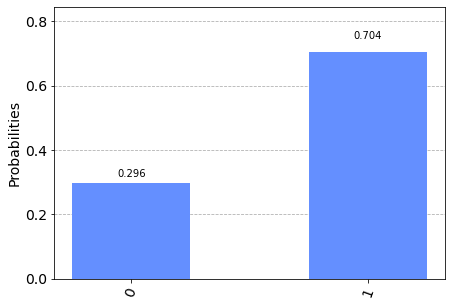

In [3]:
from qiskit import execute, Aer

simulator = Aer.get_backend('qasm_simulator')
counts = execute(my_circuit, backend=simulator, shots=10000).result().get_counts()

from qiskit.visualization import plot_histogram
print(counts)
plot_histogram(counts)

# First, let's define the cost. Want closer to `1`

In [4]:
def cost(given_counts):
    
    if '0' not in given_counts:
        given_counts['0'] = 0
    if '1' not in given_counts:
        given_counts['1'] = 0
    
    total_counts = given_counts['0'] + given_counts['1']

    return given_counts['0'] * 1.0 / total_counts

# Next, define a single iteration between a quantum computer and a classical computer

In [5]:
def run_once(params, print_counts = False):
    
    theta = params[0]
    phi = params[1]
    lam = params[2]
    
    my_circuit = QuantumCircuit(1)
    
    my_circuit.reset(0)
    my_circuit.u3(theta = theta, phi = phi, lam = lam, qubit=0)
    my_circuit.measure_all()
    
    simulator = Aer.get_backend('qasm_simulator')
    counts = execute(my_circuit, backend=simulator, shots=10000).result().get_counts()
    
    if print_counts: print(counts)
    
    return cost(counts)

In [6]:
run_once([0,0,0])

1.0

# Finally, let a classical computer iterate over this back-and-forth

In [7]:
from scipy.optimize import minimize

def variational_loop():    
    res = minimize(run_once, [0,0,0], method='cobyla')
    print(res)
    print(res.x)

In [8]:
variational_loop()

     fun: 0.0
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 33
  status: 1
 success: True
       x: array([3.13635831, 0.90426495, 0.13279023])
[3.13635831 0.90426495 0.13279023]


In [9]:
run_once([ 3.11335975, -0.36002647, -0.0745348 ], print_counts = True)

{'1': 10000}


0.0